In [1]:
# Importing necessary libraries 

from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suzandiab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/suzandiab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/suzandiab/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Opening txt file 
myfile = open('scraped_page.txt', encoding='utf-8') 

In [3]:
# Importing txt file

with open('scraped_page.txt', 'r', errors='ignore') as file: 
   data = file.read().replace('\n','')

In [4]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent[:2]) 

['Contents hide(Top)Events in the 20th centuryToggle Events in the 20th century subsectionSee alsoReferencesSourcesExternal linksKey events of the 20th century2 languagesArticleTalkReadEditView historyToolsFrom Wikipedia, the free encyclopediaThe 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.']


In [5]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word[:5]) 

['Contents', 'hide', '(', 'Top', ')']


In [6]:
# Frequency Distribution of the words 

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4783 samples and 20128 outcomes>


In [7]:
# 10 most common words 
dist_words.most_common(10)

[('.', 1285),
 ('the', 1086),
 (',', 990),
 ('of', 597),
 ('and', 395),
 ('to', 319),
 ('[', 303),
 (']', 303),
 ('The', 301),
 ('in', 287)]

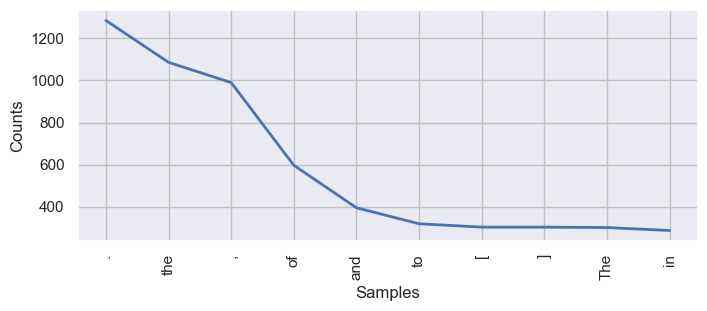

In [8]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10, cumulative=False)
plt.show()

In [9]:
# Defining stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(list(stop_words)[:10])

['before', 'aren', 'few', 'haven', 'shan', "you're", 'just', "isn't", 'this', 'myself']


In [10]:
# Removing stopwords in text

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [11]:
# Viewing filtered words list 
print(filtered_words[:10])

['Contents', 'hide', '(', 'Top', ')', 'Events', '20th', 'centuryToggle', 'Events', '20th']


In [12]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4679 samples and 15512 outcomes>


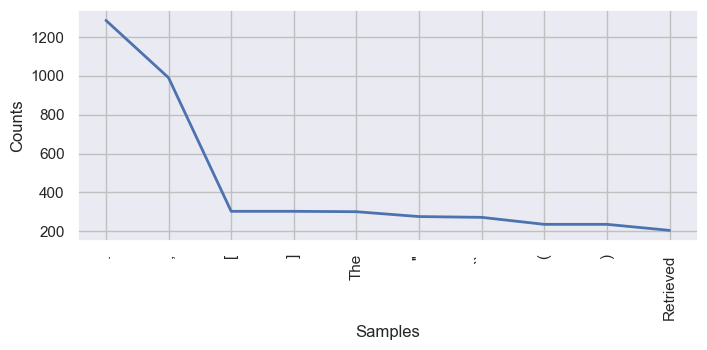

In [13]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [14]:
# Viewing list
dist_words_filter

FreqDist({'.': 1285, ',': 990, '[': 303, ']': 303, 'The': 301, "''": 276, '``': 272, '(': 236, ')': 236, 'Retrieved': 205, ...})

In [15]:
# Remove all punctuation marks 

sans_punc = re.sub("[^a-zA-Z]", " ", str(filtered_words))

In [16]:
# Viewing object 
print(sans_punc[:10])

  Contents


In [17]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2[:3])

['Contents', 'hide', 'Top']


In [18]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

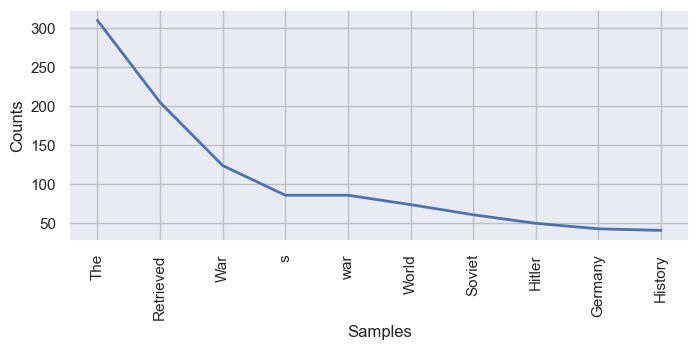

In [19]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(10, cumulative = False)
plt.show()

Stop words are common words that don't provide much meaning on their own, such as "the" and "a". Punctuation marks also don't carry meaning. When I removed these, I can focus on the content words that carry the most meaning. This made it easier to see what the most important words in the text are.

In [20]:
# 20 most common words 
dist_words_filter_2.most_common(20)

[('The', 310),
 ('Retrieved', 205),
 ('War', 124),
 ('s', 86),
 ('war', 86),
 ('World', 74),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 43),
 ('History', 41),
 ('www', 39),
 ('ISBN', 39),
 ('first', 38),
 ('In', 37),
 ('world', 36),
 ('would', 35),
 ('Japanese', 35),
 ('German', 34),
 ('edit', 33),
 ('Japan', 33)]

In [21]:
# Assigning more stop words 
new_stopwords = ['The', 's', 'www', 'ISBN', 'In', 'would', 'edit', 'th']

In [22]:
# Filtering out stop words 
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [23]:
# Creating textblob object 
%time text = TextBlob(' '.join(filtered))

CPU times: user 445 µs, sys: 1 µs, total: 446 µs
Wall time: 451 µs


In [24]:
# Viewing object 
print(text[:8])

Contents


In [25]:
# Assigning tags to different words 
tags_list = text.tags

In [26]:
# Viewing tags 
print(tags_list[:3])

[('Contents', 'NNS'), ('hide', 'VBP'), ('Top', 'JJ')]


In [27]:
# Storing tags in a data frame 
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [28]:
# Viewing dataframe 
df_text.head()

,Words,Word type
0,Contents,NNS
1,hide,VBP
2,Top,JJ
3,Events,NNS
4,centuryToggle,JJ


In [29]:
# Create a dictionary mapping POS tags to their full names
pos_tag_names = {
        'CC': 'Coordinating conjunction',
        'CD': 'Cardinal number',
        'DT': 'Determiner',
        'EX': 'Existential there',
        'FW': 'Foreign word',
        'IN': 'Preposition or subordinating conjunction',
        'JJ': 'Adjective',
        'JJR': 'Adjective, comparative',
        'JJS': 'Adjective, superlative',
        'LS': 'List item marker',
        'MD': 'Modal',
        'NN': 'Noun, singular or mass',
        'NNS': 'Noun, plural',
        'NNP': 'Proper noun, singular',
        'NNPS': 'Proper noun, plural',
        'PDT': 'Predeterminer',
        'POS': 'Possessive ending',
        'PRP': 'Personal pronoun',
        'PRP$': 'Possessive pronoun',
        'RB': 'Adverb',
        'RBR': 'Adverb, comparative',
        'RBS': 'Adverb, superlative',
        'RP': 'Particle',
        'SYM': 'Symbol',
        'TO': 'to',
        'UH': 'Interjection',
        'VB': 'Verb, base form',
        'VBD': 'Verb, past tense',
        'VBG': 'Verb, gerund or present participle',
        'VBN': 'Verb, past participle',
        'VBP': 'Verb, non-3rd person singular present',
        'VBZ': 'Verb, 3rd person singular present',
        'WDT': 'Wh-determiner',
        'WP': 'Wh-pronoun',
        'WP$': 'Possessive wh-pronoun',
        'WRB': 'Wh-adverb'
}

In [30]:
# Add a new column named "Name" to the dataframe
df_text["Name"] = df_text["Word type"].apply(lambda x: pos_tag_names.get(x))

In [31]:
df_text.head()

,Words,Word type,Name
0,Contents,NNS,"Noun, plural"
1,hide,VBP,"Verb, non-3rd person singular present"
2,Top,JJ,Adjective
3,Events,NNS,"Noun, plural"
4,centuryToggle,JJ,Adjective


In [32]:
# Grouping df by word type 
df_t = df_text.groupby('Word type').count().reset_index()

In [33]:
# Viewing df 
df_t.head()

,Word type,Words,Name
0,CC,10,10
1,CD,62,62
2,DT,46,46
3,EX,3,3
4,FW,9,9


In [34]:
# Viewing 10 largest tags 
top10 = df_t.nlargest(10, 'Words')

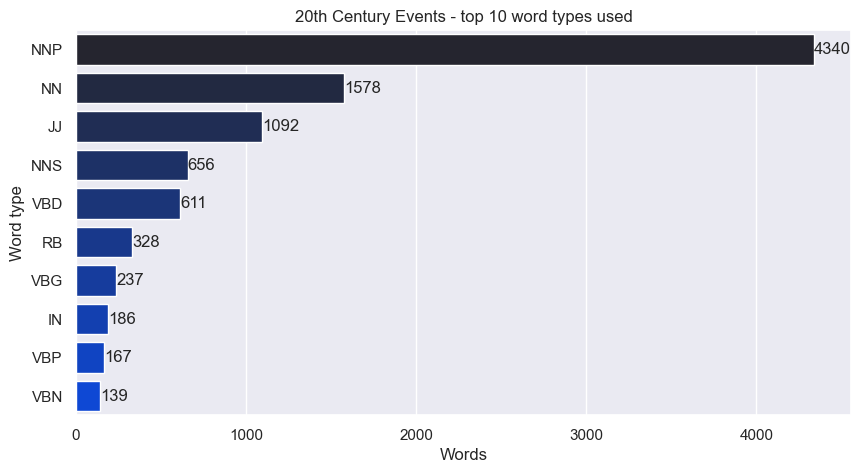

In [35]:
# Plotting tags 
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("20th Century Events - top 10 word types used")
# Adding values to the bars
for index, value in enumerate(top10["Words"]):  # Assuming "Word count" is the column containing the values for the bars
    plt.text(value, index, str(value), ha='left', va='center')  # Specify the x-coordinate for the text annotations
plt.show()

In [36]:
# Assigning these categories as nouns 
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences", "Name"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15n = y.nlargest(15, 'Occurences')

In [37]:
# Viewing nouns 
top15n

,Word,Occurences,Name
1234,Retrieved,188,188
1550,War,124,124
2639,war,86,86
1596,World,74,74
665,Hitler,50,50
587,Germany,43,43
1354,Soviet,42,42
663,History,41,41
2664,world,36,36
766,Japan,33,33


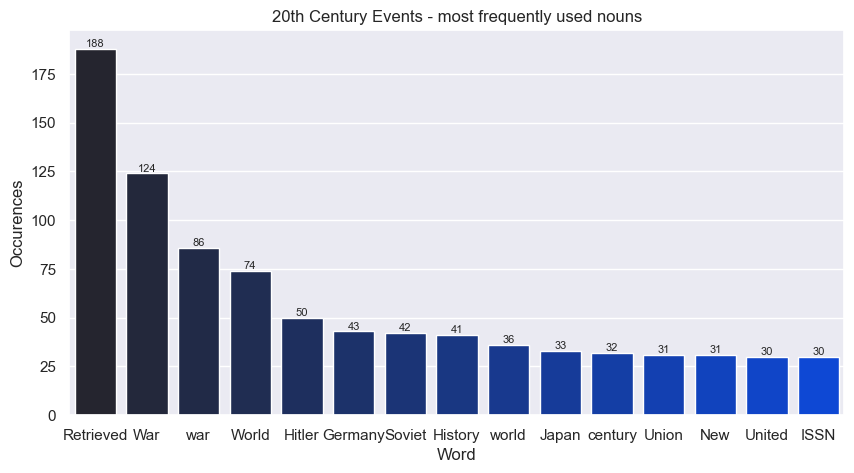

In [38]:
# Plotting nouns
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15n).set_title("20th Century Events - most frequently used nouns")
# Adding values to the bars
for index, value in enumerate(top15n["Occurences"]):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)
plt.show()

In [39]:
# Assigning categories as verbs 
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences", "Name"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15v = y.nlargest(15, 'Occurences')

In [40]:
# Viewing verbs 
top15v

,Word,Occurences,Name
49,became,27,27
205,led,14,14
51,began,13,13
203,launched,12,12
63,came,12,12
13,Retrieved,11,11
213,made,10,10
334,took,7,7
69,changed,7,7
337,turned,7,7


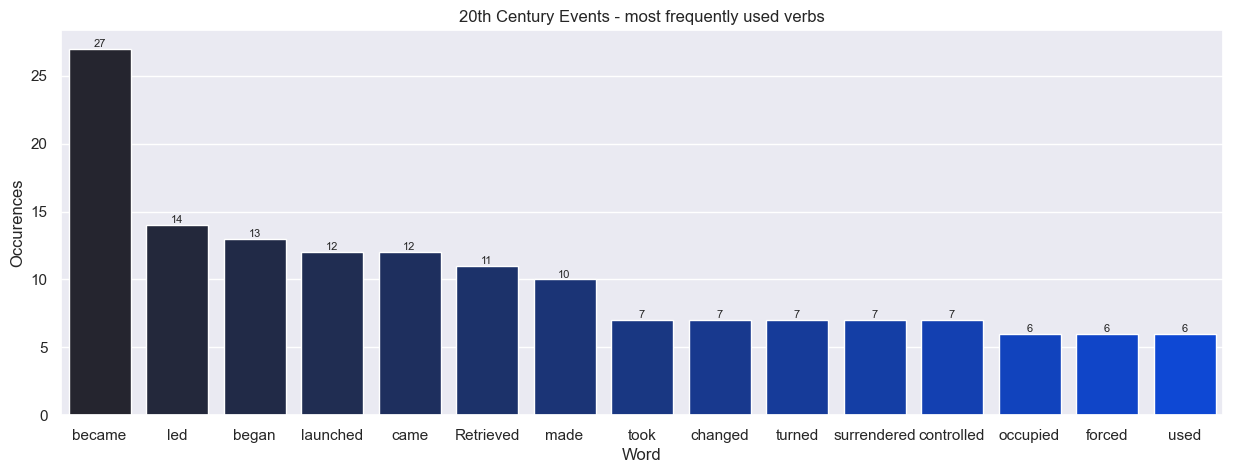

In [41]:
# Plotting verbs 
plt.figure(figsize = (15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15v).set_title("20th Century Events - most frequently used verbs")
# Adding values to the bars
for index, value in enumerate(top15v["Occurences"]):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)
plt.show()

In [42]:
# Assigning category to adjectives
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences", "Name"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15a = y.nlargest(15, 'Occurences')

In [43]:
# Viewing adjective 
top15a

,Word,Occurences,Name
28,Japanese,26,26
355,nuclear,26,26
21,German,26,26
347,new,22,22
53,Soviet,19,19
218,first,19,19
322,many,19,19
2,American,18,18
184,economic,12,12
6,British,12,12


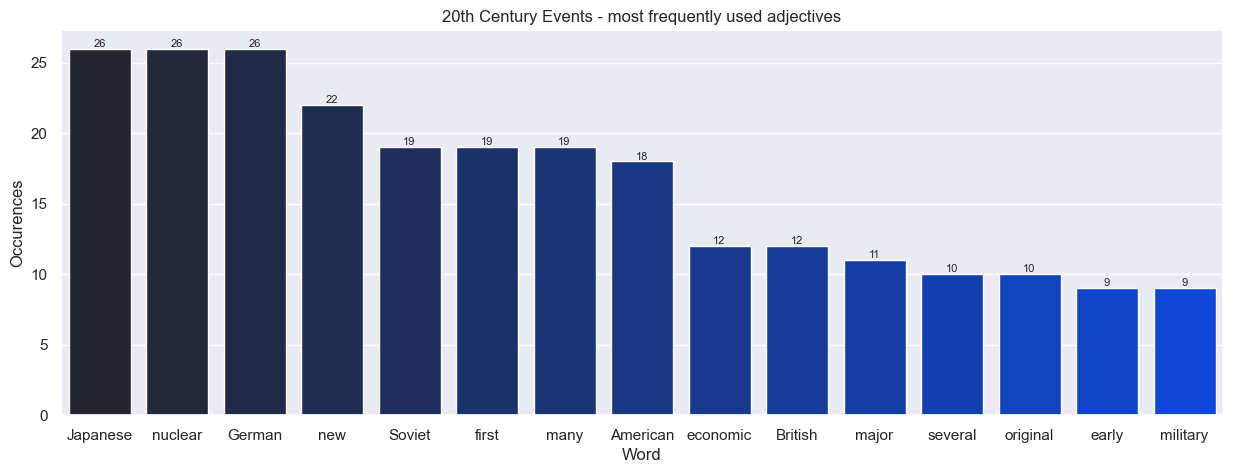

In [44]:
# Plotting adjective 
plt.figure(figsize=(15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15a).set_title("20th Century Events - most frequently used adjectives")
# Adding values to the bars
for index, value in enumerate(top15a["Occurences"]):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)
plt.show()

The word "war" stands out the most in the noun graph. This is because war is a significant event that happened multiple times throughout the 20th century. 
In additon, the word "Japanese" is mentioned a lot because of their major participation in world war II during the 20th century.

In [45]:
# Contains words from the text 
listToStr = ' '.join(filtered)
 
print(listToStr[:10])

Contents h


In [46]:
# Create a count for each word 

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).lower().split())

In [47]:
# Viewing count 
print(all_counts)

Counter({'war': 211, 'retrieved': 205, 'world': 110, 'history': 74, 'soviet': 62, 'new': 53, 'first': 51, 'hitler': 50, 'germany': 43, 'battle': 39, 'nuclear': 39, 'century': 38, 'states': 35, 'japanese': 35, 'german': 34, 'japan': 33, 'germans': 32, 'union': 32, 'united': 30, 's': 30, 'issn': 30, 'ii': 29, 'com': 29, 'space': 28, 'europe': 28, 'also': 28, 'weapons': 28, 'became': 27, 'a': 27, 'u': 26, 'end': 25, 'nations': 25, 'many': 25, 'american': 24, 'army': 24, 'computer': 24, 'attack': 23, 'this': 22, 'countries': 21, 'main': 21, 'stalin': 21, 'one': 21, 'holocaust': 21, 'second': 21, 'p': 21, 'north': 21, 'africa': 21, 'bbc': 21, 'allies': 20, 'british': 20, 'allied': 20, 'state': 19, 'forces': 19, 'however': 19, 'people': 19, 'two': 19, 'nazi': 19, 'britain': 19, 'invasion': 19, 'day': 19, 'july': 19, 'later': 18, 'could': 18, 'east': 18, 'september': 18, 'june': 18, 'great': 17, 'time': 17, 'jews': 17, 'august': 17, 'may': 17, 'wars': 16, 'cold': 16, 'france': 16, 'april': 16

In [48]:
# Reading list of coutnries from CSV file
countries = pd.read_csv("countries_list_20th.csv")

In [49]:
# Viewing countries 
countries.head()

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola


In [50]:
# Creating list of country names 
countries_list = countries['country_name'].tolist()

In [51]:
# Viewing list 
print("List of Countries:", countries_list)

List of Countries: ['Afghanistan ', 'Albania ', 'Algeria ', 'Andorra ', 'Angola ', 'Antigua and Barbuda ', 'Argentina ', 'Armenia ', 'Australia ', 'Austria ', 'Azerbaijan', 'Bahamas', 'Bahrain ', 'Bangladesh ', 'Barbados ', 'Belarus ', 'Belgium ', 'Belize ', 'Benin ', 'Bhutan ', 'Bolivia ', 'Bosnia and Herzegovina ', 'Botswana ', 'Brazil ', 'Brunei Darussalam', 'Bulgaria ', 'Burkina Faso ', 'Burundi', 'Cabo Verde ', 'Cambodia ', 'Cameroon', 'Canada', 'Central African Republic ', 'Chad ', 'Chile ', 'China', 'Colombia ', 'Comoros ', 'Congo', 'Costa Rica', "Côte D'Ivoire", 'Croatia ', 'Cuba ', 'Cyprus ', 'Czechia', 'Denmark ', 'Djibouti ', 'Dominica ', 'Dominican Republic', 'Timor-Leste', 'Ecuador ', 'Egypt ', 'El Salvador ', 'Equatorial Guinea ', 'Eritrea ', 'Estonia ', 'Eswatini ', 'Ethiopia', 'Fiji ', 'Finland ', 'France', 'Gabon ', 'Gambia (Republic of The)', 'Georgia ', 'Germany ', 'Ghana ', 'Greece ', 'Grenada ', 'Guatemala ', 'Guinea ', 'Guinea Bissau', 'Bissau ', 'Guyana', 'Haiti 

In [52]:
# Creating a dictionary of counts for countries mentioned in text 
dict_of_counts = {}
for country in countries_list:
    country_normalized = country.lower().strip()
    if country_normalized in all_counts:
        dict_of_counts[country] = all_counts[country_normalized]
    else:
        dict_of_counts[country] = 0

In [53]:
# Viewing dictionary of counts 
print("Dictionary of Counts:", dict_of_counts)

Dictionary of Counts: {'Afghanistan ': 1, 'Albania ': 2, 'Algeria ': 1, 'Andorra ': 0, 'Angola ': 1, 'Antigua and Barbuda ': 0, 'Argentina ': 0, 'Armenia ': 0, 'Australia ': 2, 'Austria ': 5, 'Azerbaijan': 0, 'Bahamas': 0, 'Bahrain ': 0, 'Bangladesh ': 2, 'Barbados ': 0, 'Belarus ': 1, 'Belgium ': 2, 'Belize ': 0, 'Benin ': 0, 'Bhutan ': 0, 'Bolivia ': 0, 'Bosnia and Herzegovina ': 0, 'Botswana ': 0, 'Brazil ': 0, 'Brunei Darussalam': 0, 'Bulgaria ': 2, 'Burkina Faso ': 0, 'Burundi': 0, 'Cabo Verde ': 0, 'Cambodia ': 2, 'Cameroon': 0, 'Canada': 2, 'Central African Republic ': 0, 'Chad ': 0, 'Chile ': 0, 'China': 10, 'Colombia ': 0, 'Comoros ': 0, 'Congo': 1, 'Costa Rica': 0, "Côte D'Ivoire": 0, 'Croatia ': 0, 'Cuba ': 3, 'Cyprus ': 0, 'Czechia': 0, 'Denmark ': 3, 'Djibouti ': 0, 'Dominica ': 0, 'Dominican Republic': 0, 'Timor-Leste': 0, 'Ecuador ': 0, 'Egypt ': 2, 'El Salvador ': 0, 'Equatorial Guinea ': 0, 'Eritrea ': 0, 'Estonia ': 2, 'Eswatini ': 0, 'Ethiopia': 0, 'Fiji ': 0, 'Finla

In [54]:
# Converting dictionary to a dataframe 
counts_df = pd.DataFrame(list(dict_of_counts.items()), columns=['Country', 'Mentions'])

In [55]:
# Viewing df 
print(counts_df[:5])

        Country  Mentions
0  Afghanistan          1
1      Albania          2
2      Algeria          1
3      Andorra          0
4       Angola          1


In [ ]:
# Plotting df with countries and number of mentions 
plt.figure(figsize=(10, len(counts_df) * 0.5))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Mentions", y = "Country",
    saturation=0.9, data = counts_df.sort_values("Mentions", ascending = False)).set_title("20th Century - most frequently mentioned countries")
# Adding values to the bars
for index, value in enumerate(counts_df["Mentions"].sort_values(ascending=False)):
    plt.text(value, index, str(value), ha='left', va='center')  # Specify the x-coordinate for the text annotations
plt.show()

Germany and Japan are mentioned the most due to their involvement in conflicts such as world war II in the 20th century. They were the two main Axis powers during world war II.